<a href="https://colab.research.google.com/github/Gramani-Kumar/DL-Demo/blob/master/BatchNorm_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Normalization and Dropout
  - Batch Normalization : Doing normalization won't be enough as data flow in network with various computation the range will be again deviate, So apply the normalization every or few subsequent layer. Since we are doing with batch of data hence it is called as Batch Normalization.
  - Dropout : Ensample mechanisam. ie. instead train all the neuron, train randomly in each iteration, by neuron to zero.
       - Act as reqularizer 
       - Prevent co-adaptation.

In [1]:
#we will work with MNIST dataset which has image of handwritten numbers.

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#define transform

simpleToTorch = transforms.Compose([transforms.ToTensor()])

trainDataset = torchvision.datasets.MNIST("./data", train=True, download = True, transform=simpleToTorch)

In [ ]:
testDataset = torchvision.datasets.MNIST("./data", train=False, download = True, transform = simpleToTorch)

In [ ]:
#Dataloader from dataset
batch_size = 4
trainDataLoader = torch.utils.data.DataLoader(trainDataset, batch_size= batch_size, shuffle=True)

In [ ]:
#let see what is in it
dloader = iter(trainDataLoader)
image,label = dloader.next()

print(image.shape)

torch.Size([4, 1, 28, 28])


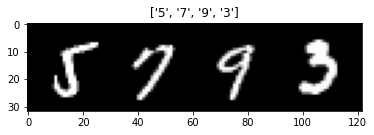

In [ ]:
image,label = dloader.next()

plt.title( [str(x.item()) for x in label])  #List with title.
plt.imshow(torchvision.utils.make_grid(image).numpy().transpose(1,2,0))
plt.show()


#Batch Normaliation

In [ ]:
#Create Network without any Normaliation.

class myNet(nn.Module):
  def __init__(self):
    super(myNet,self).__init__()

    self.net = torch.nn.Sequential(
        torch.nn.Linear(784, 48), #28x28 
        torch.nn.ReLU(),
        torch.nn.Linear(48, 24),
        torch.nn.ReLU(),
        torch.nn.Linear(24, 10)
    )

  def forward(self,x):
    #Flatten the image to 1D vec 28x28 to 784
    x = x.view(x.size(0),-1)
    x = self.net(x)
    return x  # x will be 1D 10 values





In [ ]:
#Create Network WITH normaliation.
# Note : normaliation can be applied either before or after to activiation.

class myNet_bn(nn.Module):
  def __init__(self):
    super(myNet_bn, self).__init__()

    self.net = nn.Sequential(
        nn.Linear(784, 48),
        nn.BatchNorm1d(48),
        nn.ReLU(),
        nn.Linear(48,24),
        nn.BatchNorm1d(24),
        nn.ReLU(),
        nn.Linear(24, 10)
    )

  def forward(self, x):
    #flatten the image tensor
    x = x.view(x.size(0), -1)
    x = self.net(x)
    return x


In [ ]:
#Just see the structure
model = myNet()
print(model)

myNet(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [ ]:
model_bn = myNet_bn()
print(model_bn)

myNet_bn(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [ ]:
#cool now train these networks.
#set batch size to larger , 256
batch_size = 256
trainloader = torch.utils.data.DataLoader(trainDataset, batch_size=batch_size, shuffle=True)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

0.033146575 0.093802236 0.001290789 0.10381924


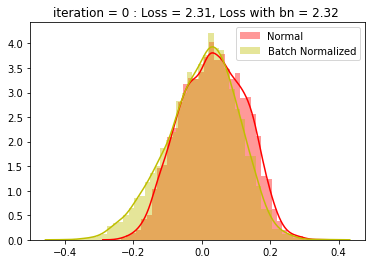

0.037426945 0.09331968 0.011490037 0.10863783


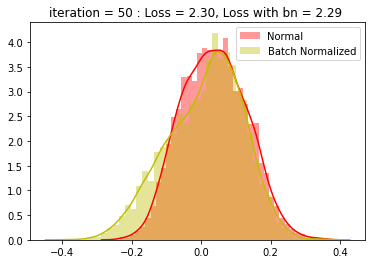

0.047019903 0.1037591 0.02507479 0.1281033


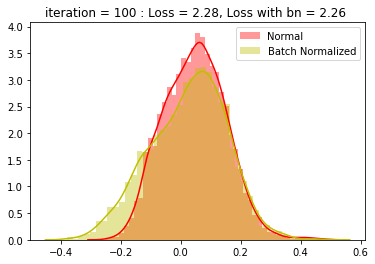

0.06358564 0.12226662 0.044615477 0.15480576


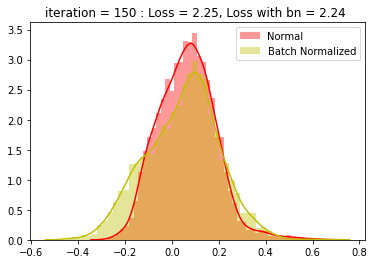

0.07928773 0.14518833 0.06893165 0.19029562


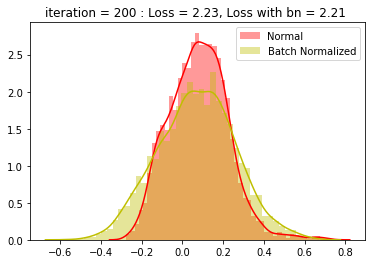

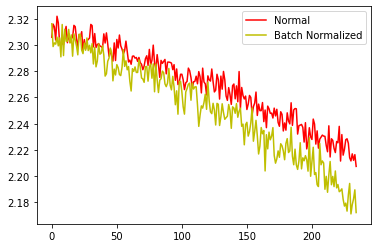

0.092315644 0.1633529 0.086215705 0.21410555


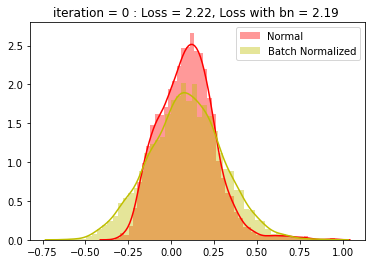

0.11377778 0.1941009 0.12497757 0.27182606


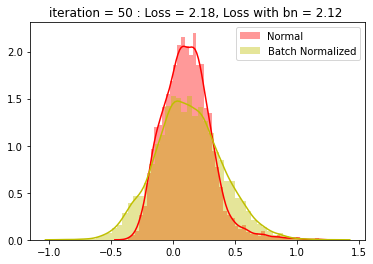

0.14012496 0.23558544 0.16824174 0.33155832


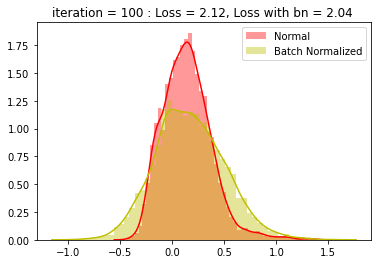

0.1675445 0.2821415 0.20700823 0.38839206


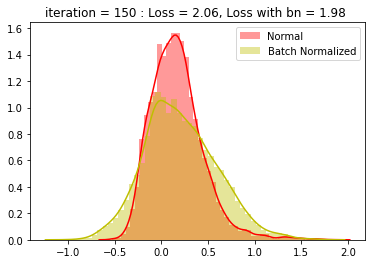

0.21709625 0.34683436 0.28664643 0.5013288


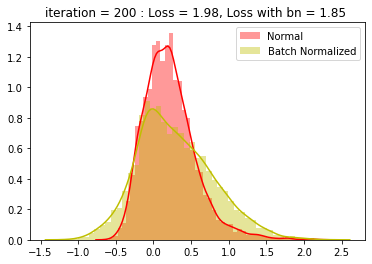

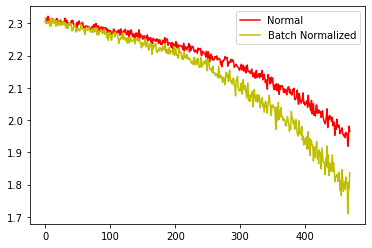

In [ ]:
#lets train two model togather
loss_arr=[]
loss_bn_arr=[]

max_epoch = 2 #5  high.

for epoch in range(max_epoch):
  for i,data in enumerate(trainloader, 0):

    images, labels = data #note data is list of [images, labels] tensor.

    opt.zero_grad()  #set optimization to Zero.
    out1 = model(images)
    loss = loss_fn(out1, labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
    
    opt_bn.zero_grad()  #set optimization to Zero.
    out2 = model_bn(images)
    loss_bn = loss_fn(out2, labels)
    loss_bn.backward()
    opt_bn.step()
    loss_bn_arr.append(loss_bn.item())

    if i % 50 == 0:
      inputs = images.view(images.size(0), -1) #flattening.

      model.eval()
      model_bn.eval()

      a = model.net[0](inputs)
      a = model.net[1](a)
      a = model.net[2](a)
      a = a.detach().numpy().ravel() #expand it last dimension
      sns.distplot(a, kde=True, color="r", label = 'Normal') #Distribution plot.


      b = model_bn.net[0](inputs)
      b = model_bn.net[1](b)
      b = model_bn.net[2](b)
      b = model_bn.net[3](b)
      b = model_bn.net[4](b)
      b = b.detach().numpy().ravel()
      sns.distplot(b, kde=True, color="y", label = 'Batch Normalized')

      #lets check the normalization factor.
      print(np.mean(a), np.std(a), np.mean(b), np.std(b))

      plt.title('iteration = %d : Loss = %0.2f, Loss with bn = %0.2f ' % (i, loss.item(), loss_bn.item()))
      plt.legend()
      plt.show()
      plt.pause(1.0)

  #Plot the loss
  plt.plot(loss_arr, color="r", label="Normal")
  plt.plot(loss_bn_arr, color="y", label="Batch Normalized")
  plt.legend()
  plt.show()

#Lets RUN

KeyPoint : if we give data which is utilizing full spectrom of value with fixed distribution the subsequent layer are able to train with it.
 - TODO : 2d Normalization :
      -it is simple , 2d Normalization can be applied if there are multiple channel in the input tensor (ex, image)
      - BatchNorm2d(output_channel_from_the_layer)
      
 - TODO : Recheck. the distributaion of normal one should shrink and go peaky.

#Lets see how Dropout helps
 - it will avoid overfitting 

In [7]:
#Create random data.
N = 25
noise = 0.3
X_train = torch.unsqueeze(torch.linspace(-1,1, N), 1)                      #create linearspaced dataset
Y_train = X_train + noise * torch.normal(torch.zeros(N,1), torch.ones(N,1)) #add some noise with std distribution.

X_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
Y_test = X_test + noise * torch.normal(torch.zeros(N,1), torch.ones(N,1)) 

In [6]:
?torch.normal()

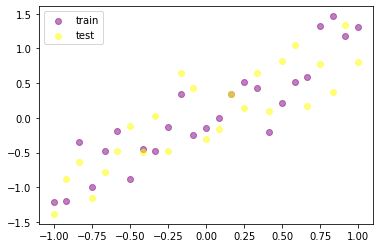

In [9]:
plt.scatter(X_train.numpy(), Y_train.numpy(), c='purple', alpha=0.5, label='train')
plt.scatter(X_test.numpy(), Y_test.numpy(), c="yellow", alpha=0.5, label='test')
plt.legend() #show label
plt.show()

In [21]:
num_hidden = 128

#creating direct net.
model = nn.Sequential(
    nn.Linear(1, num_hidden),
    nn.ReLU(),
    nn.Linear(num_hidden, num_hidden),
    nn.ReLU(),
    nn.Linear(num_hidden, 1)
)


model_dropout = nn.Sequential(
    nn.Linear(1, num_hidden),
    nn.Dropout(0.5),                #Dropout 50%
    nn.ReLU(),
    nn.Linear(num_hidden, num_hidden),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(num_hidden, 1)
)

In [22]:
opt = optim.Adam(model.parameters(), lr=0.01)
opt_drop = optim.Adam(model_dropout.parameters(), lr=0.01)
loss_fn = nn.MSELoss()    #Its simple regression y = x.

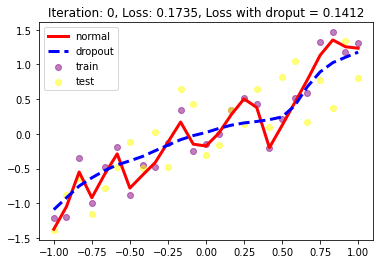

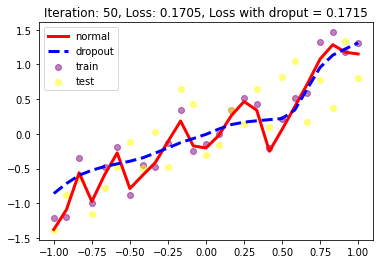

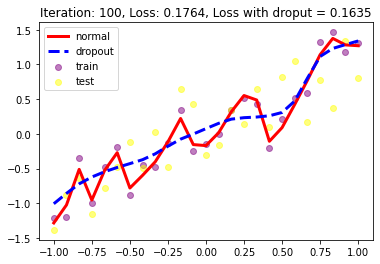

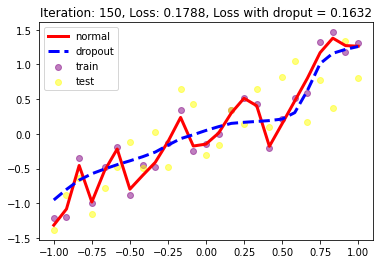

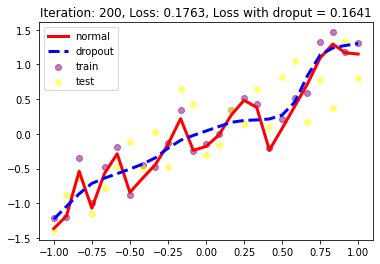

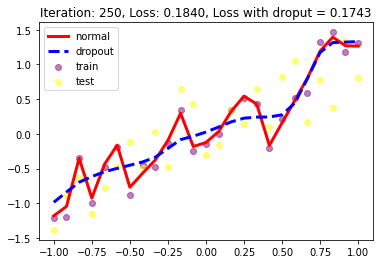

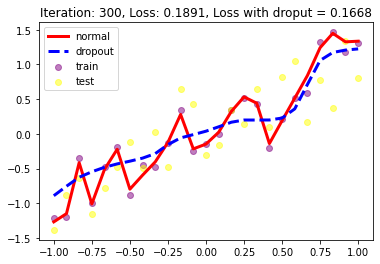

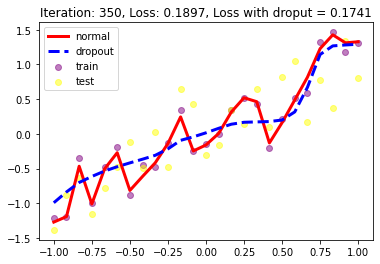

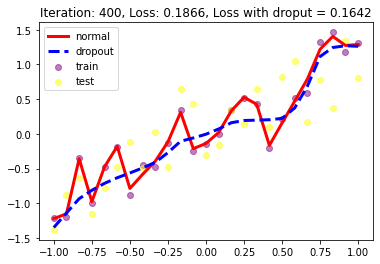

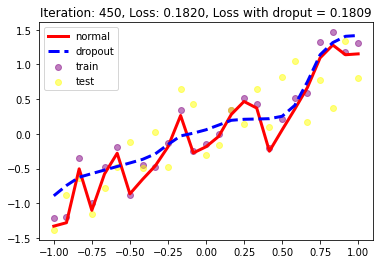

In [24]:
#train
max_epochs = 500

for epoch in range(max_epochs):

  pred = model(X_train)  # entier data in a single shot.
  loss = loss_fn(pred, Y_train)
  opt.zero_grad()
  loss.backward()
  opt.step()

  pred_dropout = model_dropout(X_train)
  loss_dropout = loss_fn(pred_dropout, Y_train)
  opt_drop.zero_grad()
  loss_dropout.backward()
  opt_drop.step()


  if epoch % 50 == 0:
    model.eval()
    model_dropout.eval() #Note: there won't be any dropout and the weight will be rescalled to probability of dropped

    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, Y_test)

    test_pred_dropout = model_dropout(X_test)
    test_loss_dropout = loss_fn(test_pred_dropout, Y_test)

    #Plot the drawing.
    plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c="purple", alpha=0.5, label='train')
    plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='Yellow', alpha=0.5, label='test')

    plt.plot(X_test.data.numpy(), test_pred.data.numpy(), 'r-', lw=3, label='normal')
    plt.plot(X_test.data.numpy(), test_pred_dropout.data.numpy(), 'b--', lw=3, label="dropout")

    plt.title("Iteration: %d, Loss: %0.4f, Loss with droput = %0.4f" %(epoch, test_loss, test_loss_dropout))
    plt.legend()

    #Put back again in train mode. #otherwise it won't dropout.
    model.train()
    model_dropout.train()
    plt.show()





#What graph shows:
   - Normal  (red) : seems overfitting to the data.
   - Dropout (blue): Regularized, not overfitting to the test data itself.
   loss also considerably less then Normal one.
  
  TODO: increase the drop probability.